# Sequentially Comparing Forecasters: Comparison of Scoring Rules

Here, we run experiments analogous to [`nb_comparecast_synthetic.ipynb`](nb_comparecast_synthetic.ipynb) but with different choices of scoring rules (Brier, spherical, zero-one, truncated logarithmic, and Winkler).

See also: Section 5.1 in our paper.

YJ Choe [yjchoe@cmu.edu]

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import comparecast as cc

## Hyperparameter Settings

In [2]:
# significance level
alpha = 0.05

# whether to use the log scale on x-axis (time)
use_logx = True

## Forecasts on Synthetic Data

The synthetic data as well as the forecasts are generated from the command line via:
```shell
python forecast.py -d default -n 10000 -f all -o forecasts/default.csv -p plots/default
```

In [3]:
data_name = "default"
data_file = f"forecasts/{data_name}.csv"
plots_dir = f"plots/{data_name}"

data = cc.data_utils.synthetic.get_data(data_file)
data

,time,data,true_probs,laplace,k29_poly3,k29_rbf0.01,always_0.5,always_0,always_1
0,1,1,0.676405,0.500000,0.500000,0.500000,0.5,0.0,1.0
1,2,1,0.540016,1.000000,0.000000,0.000000,0.5,0.0,1.0
2,3,1,0.597874,1.000000,1.000000,1.000000,0.5,0.0,1.0
3,4,0,0.724089,1.000000,1.000000,1.000000,0.5,0.0,1.0
4,5,1,0.686756,0.800000,1.000000,1.000000,0.5,0.0,1.0
...,...,...,...,...,...,...,...,...,...
9995,9996,0,0.019072,0.493497,0.201172,0.204102,0.5,0.0,1.0
9996,9997,0,0.204236,0.493448,0.210938,0.204102,0.5,0.0,1.0
9997,9998,0,0.251687,0.493399,0.208984,0.204102,0.5,0.0,1.0
9998,9999,0,0.196708,0.493349,0.206055,0.204102,0.5,0.0,1.0


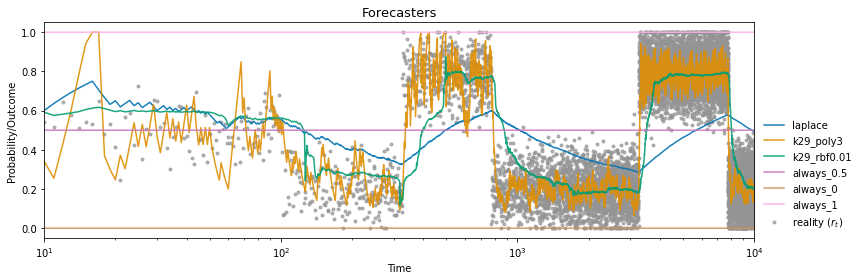

In [4]:
cc.plot_forecasts(data, ["all"], plots_dir, use_logx=use_logx)

## CS for $\Delta_t(\hat{p}_\text{k29-poly3}, \hat{p}_\text{laplace})$ for different scoring rules

*Bounds for the truncated logarithmic scoring rule:* $\log \epsilon \leq S_\epsilon(p, y) \leq 0$, with $\epsilon \in (0, 1)$, so
$$
\log \epsilon \leq S_\epsilon(p, y) - S_\epsilon(q, y) \leq -\log \epsilon
$$
For example, if $\epsilon = 0.01$, then $\log \epsilon \approx -4.6$.

In [5]:
# scoring_rule: (lo, hi)
scoring_rules = {
    "brier": (-1, 1), 
    "spherical": (-1, 1), 
    "zero_one": (-1, 1), 
    "absolute": (-1, 1),
    "logarithmic": (np.log(0.01), -np.log(0.01)),
}

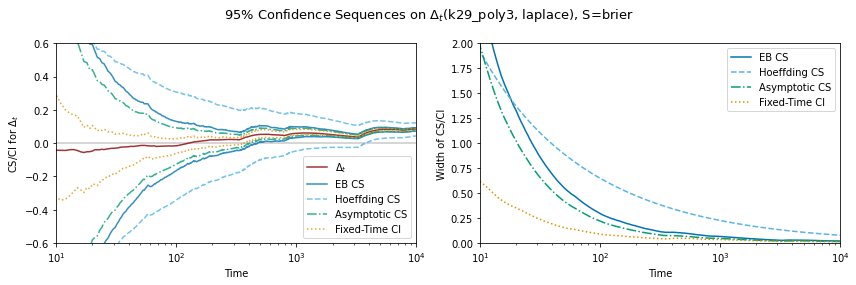

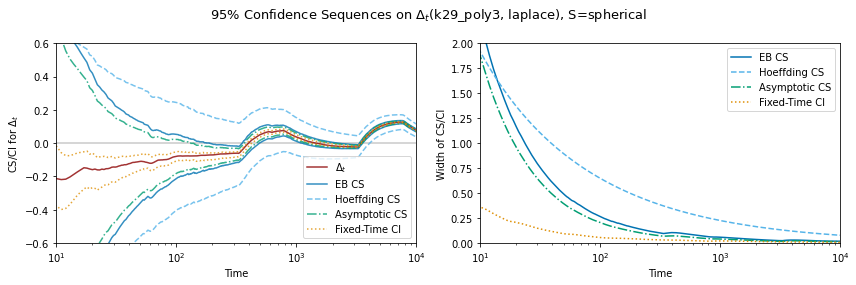

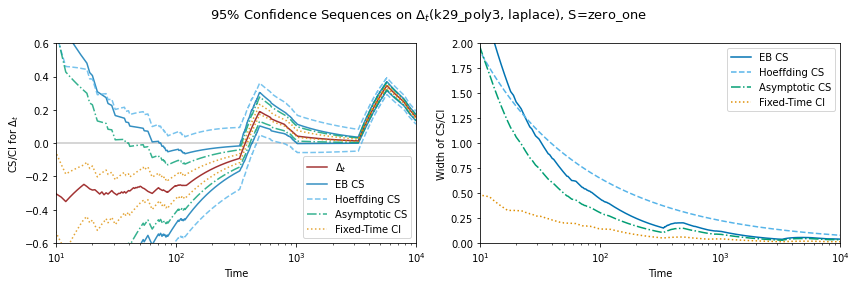

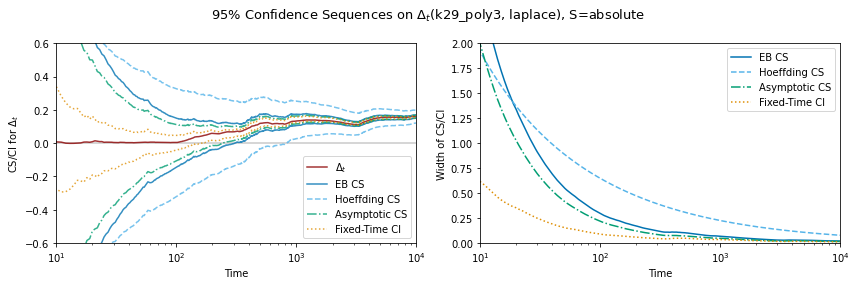

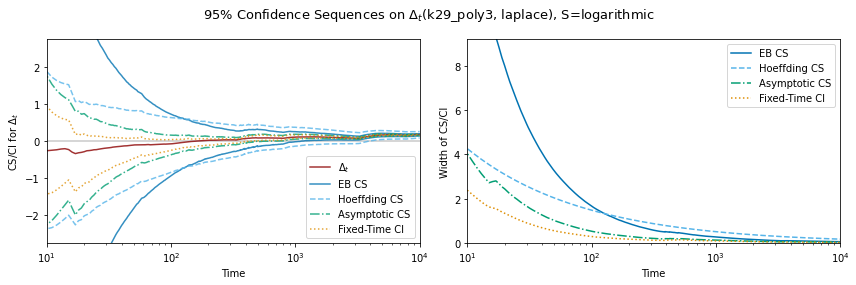

In [6]:
name_p = "k29_poly3"
name_q = "laplace"

for scoring_rule, (lo, hi) in scoring_rules.items():
    results, axes = cc.plot_comparison(
        data, 
        name_p, 
        name_q, 
        scoring_rule=scoring_rule,    
        plots_dir=plots_dir, 
        alpha=alpha,
        lo=lo,
        hi=hi,
        compare_baselines=("h", "acs", "ci"),
        use_logx=use_logx,
    )

## CS for $\Delta_t(\hat{p}_\text{always-0}, \hat{p}_\text{always-1})$ for different scoring rules

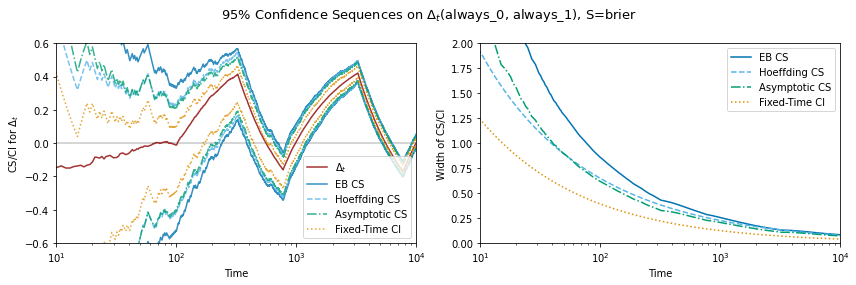

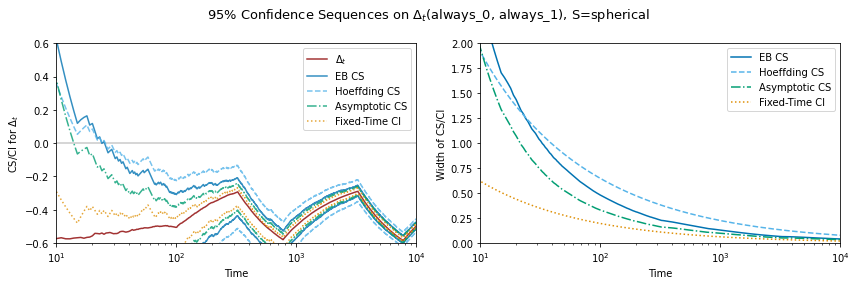

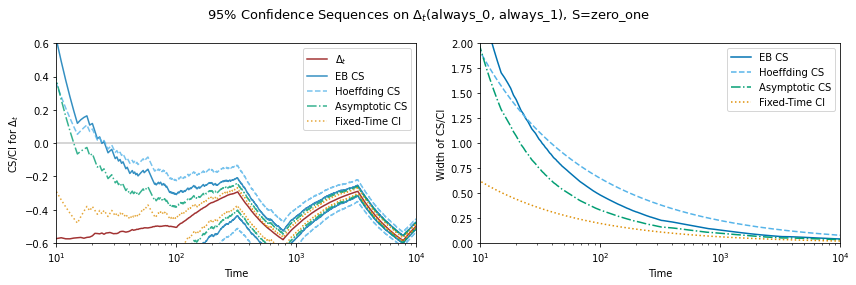

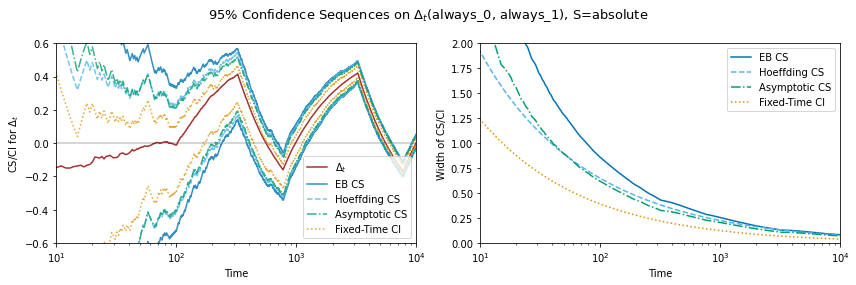

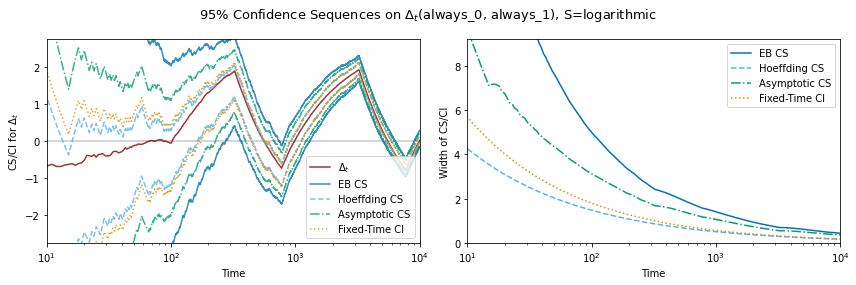

In [7]:
name_p = "always_0"
name_q = "always_1"

for scoring_rule, (lo, hi) in scoring_rules.items():
    results, axes = cc.plot_comparison(
        data, 
        name_p, 
        name_q, 
        scoring_rule=scoring_rule,    
        plots_dir=plots_dir, 
        alpha=alpha,
        lo=lo,
        hi=hi,
        compare_baselines=("h", "acs", "ci"),
        use_logx=use_logx,
    )

## Winkler's Normalized Scores

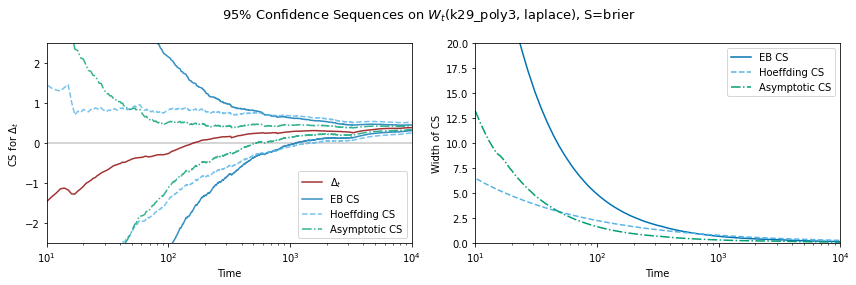

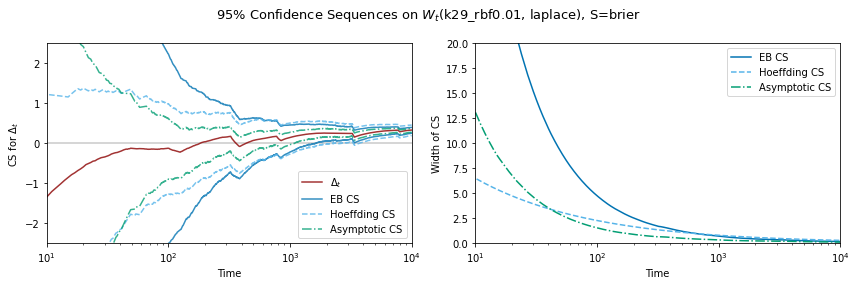

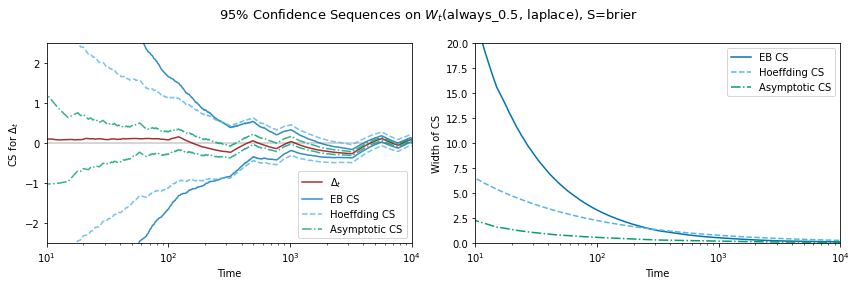

In [8]:
scoring_rule = "winkler"
baseline = "laplace"
q0 = 0.1
data[baseline] = data[baseline].clip(lower=q0, upper=1-q0)
lo, hi = 1 - 2/q0, 1
for name_p in ["k29_poly3", "k29_rbf0.01", "always_0.5"]:
    results, axes = cc.plot_comparison(
        data, 
        name_p, 
        baseline, 
        scoring_rule=scoring_rule,    
        plots_dir=plots_dir, 
        alpha=alpha,
        lo=lo,
        hi=hi,
        compare_baselines=("h", "acs"),
        use_logx=use_logx,
    ) 
#     axes[0].set(ylim=(-10, 1.05))
#     axes[1].set(ylim=(0, 10))